In [1]:
from sklearn import tree
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt



In [2]:
wine = load_wine()
wine.target

wine.data.shape

(178, 13)

In [3]:
feature_names = wine.feature_names
feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [4]:
target_names = wine.target_names
target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [5]:
import pandas as pd
pd.concat([pd.DataFrame(wine.data), pd.DataFrame(wine.target)], axis=1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,0
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [6]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(wine.data, wine.target, test_size=0.3)
model = tree.DecisionTreeClassifier(criterion="entropy" # entropy or gini, entropy maybe overfitting
                                    ,random_state=30   # random seeds
                                   ,splitter="best"  # random split, these two parameters can avoid overfitting
)
model.fit(Xtrain, Ytrain)
score = model.score(Xtest, Ytest)
score

0.9629629629629629

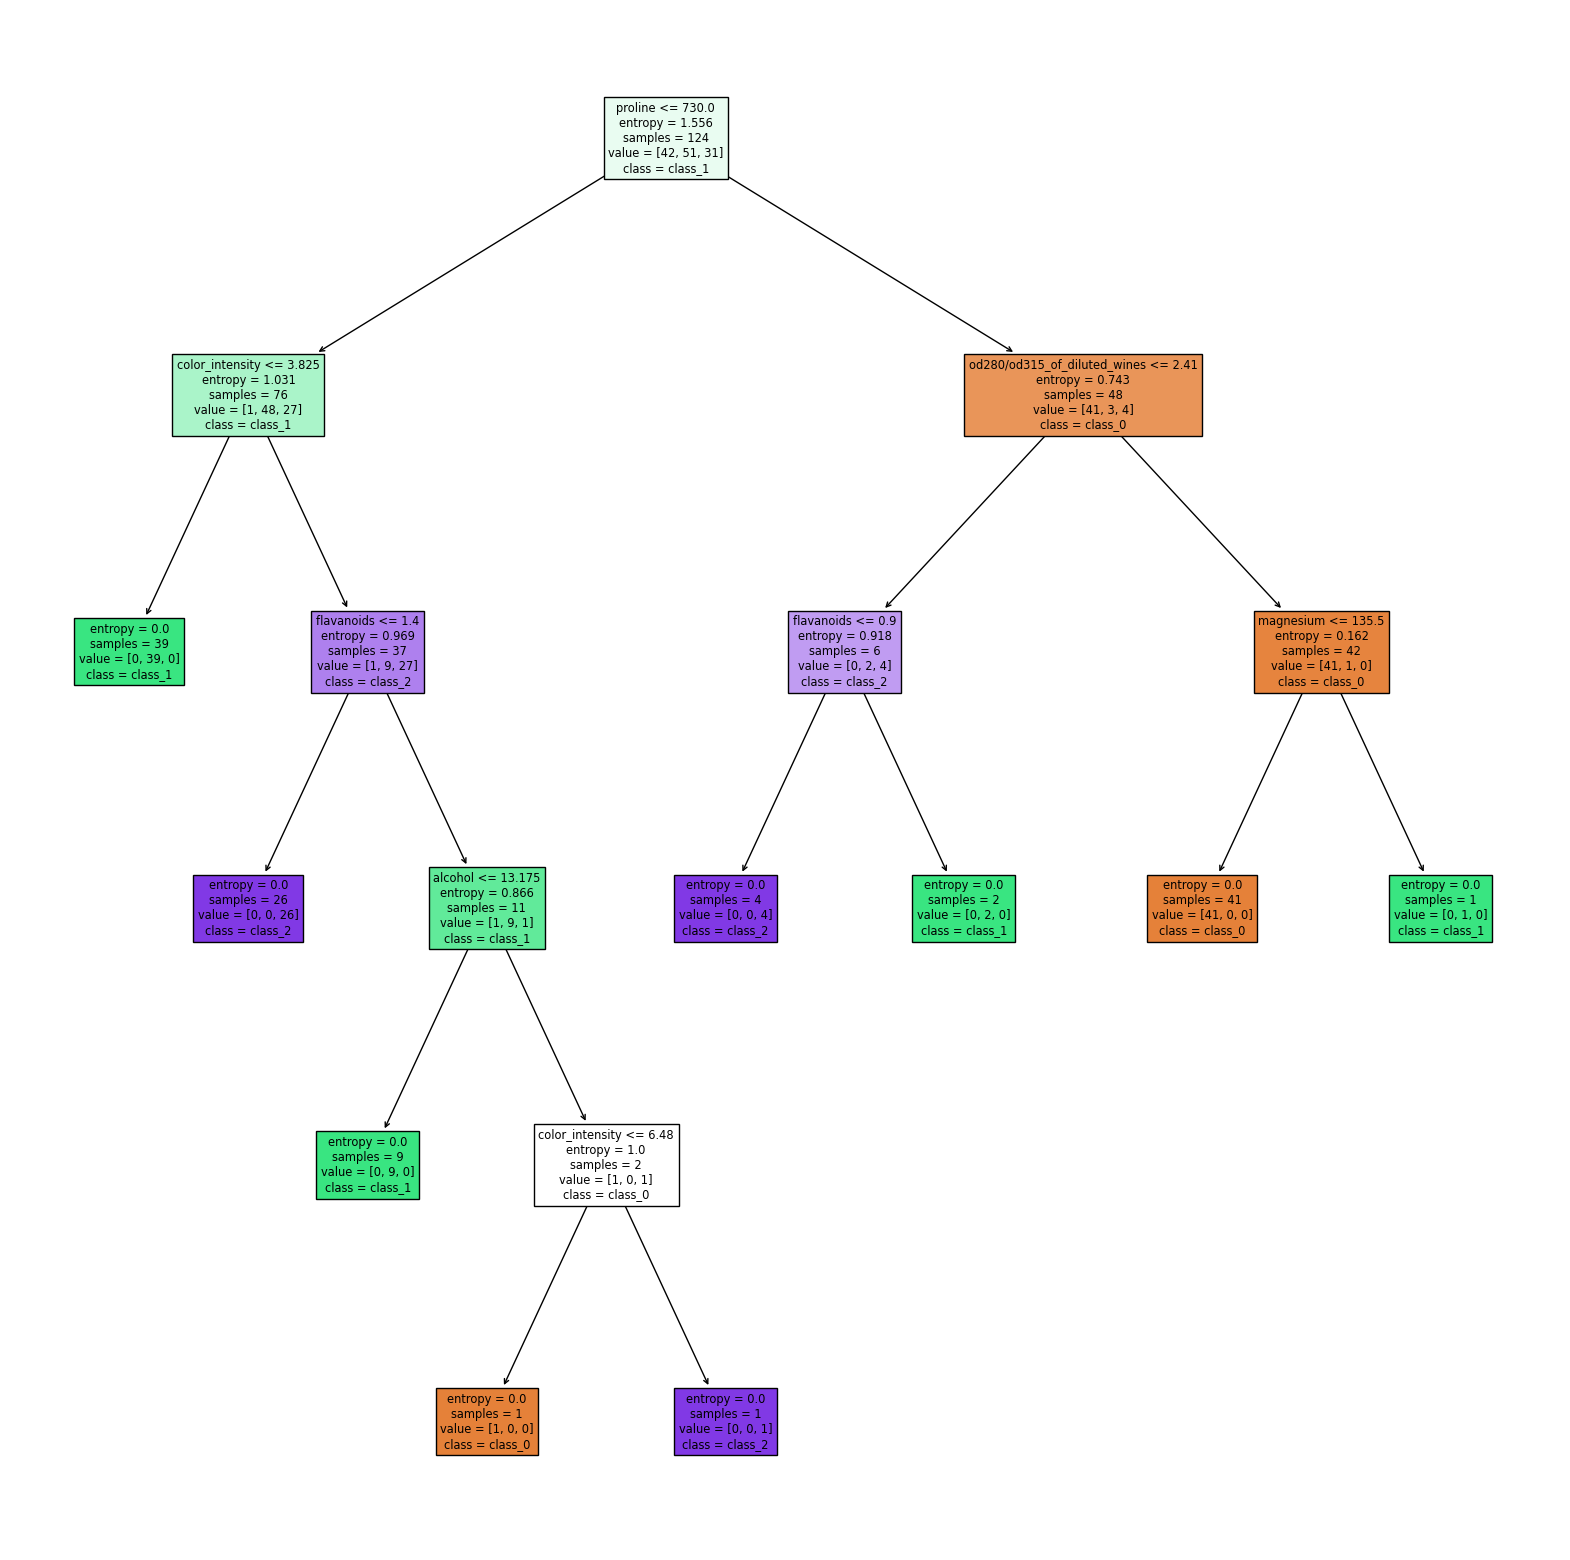

In [7]:
fig =plt.figure(figsize=(20,20))
_ = tree.plot_tree(model
                   ,feature_names=wine.feature_names
                   ,class_names=wine.target_names
                   ,filled=True
                 #  ,rounded=True
                   )

In [8]:
model.feature_importances_
[*zip(feature_names, model.feature_importances_)]

[('alcohol', 0.03899286268576717),
 ('malic_acid', 0.0),
 ('ash', 0.0),
 ('alcalinity_of_ash', 0.0),
 ('magnesium', 0.03533050047968324),
 ('total_phenols', 0.0),
 ('flavanoids', 0.16491664877896306),
 ('nonflavanoid_phenols', 0.0),
 ('proanthocyanins', 0.0),
 ('color_intensity', 0.23083390474105334),
 ('hue', 0.0),
 ('od280/od315_of_diluted_wines', 0.12093226183616),
 ('proline', 0.40899382147837315)]

In [ ]:
# Optimizations parameters
# In this part, we test max_depth, min_samples_leaf, min_samples_split
# max_depth: the maximum depth of the tree
# min_samples_leaf: the minimum number of samples required to be at a leaf node (指的是叶子节点，及拆分后的最小样本数)
# min_samples_split: the minimum number of samples required to split an internal node （指的是内部节点，及拆分前的最小样本数）



In [129]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(wine.data, wine.target, test_size=0.3)
model = tree.DecisionTreeClassifier(criterion="entropy" # entropy or gini, entropy maybe overfitting
                                    ,random_state=30   # random seeds
                                   ,splitter="random"  # random split, these two parameters can avoid overfitting
                                    ,max_depth=3
                                   ,min_samples_leaf=8 # the minimum number of samples required to be at a leaf node
                                  #  ,min_samples_split=10  # the minimum number of samples required to split an internal node 
                )
model.fit(Xtrain, Ytrain)
score = model.score(Xtest, Ytest)
score

0.9629629629629629

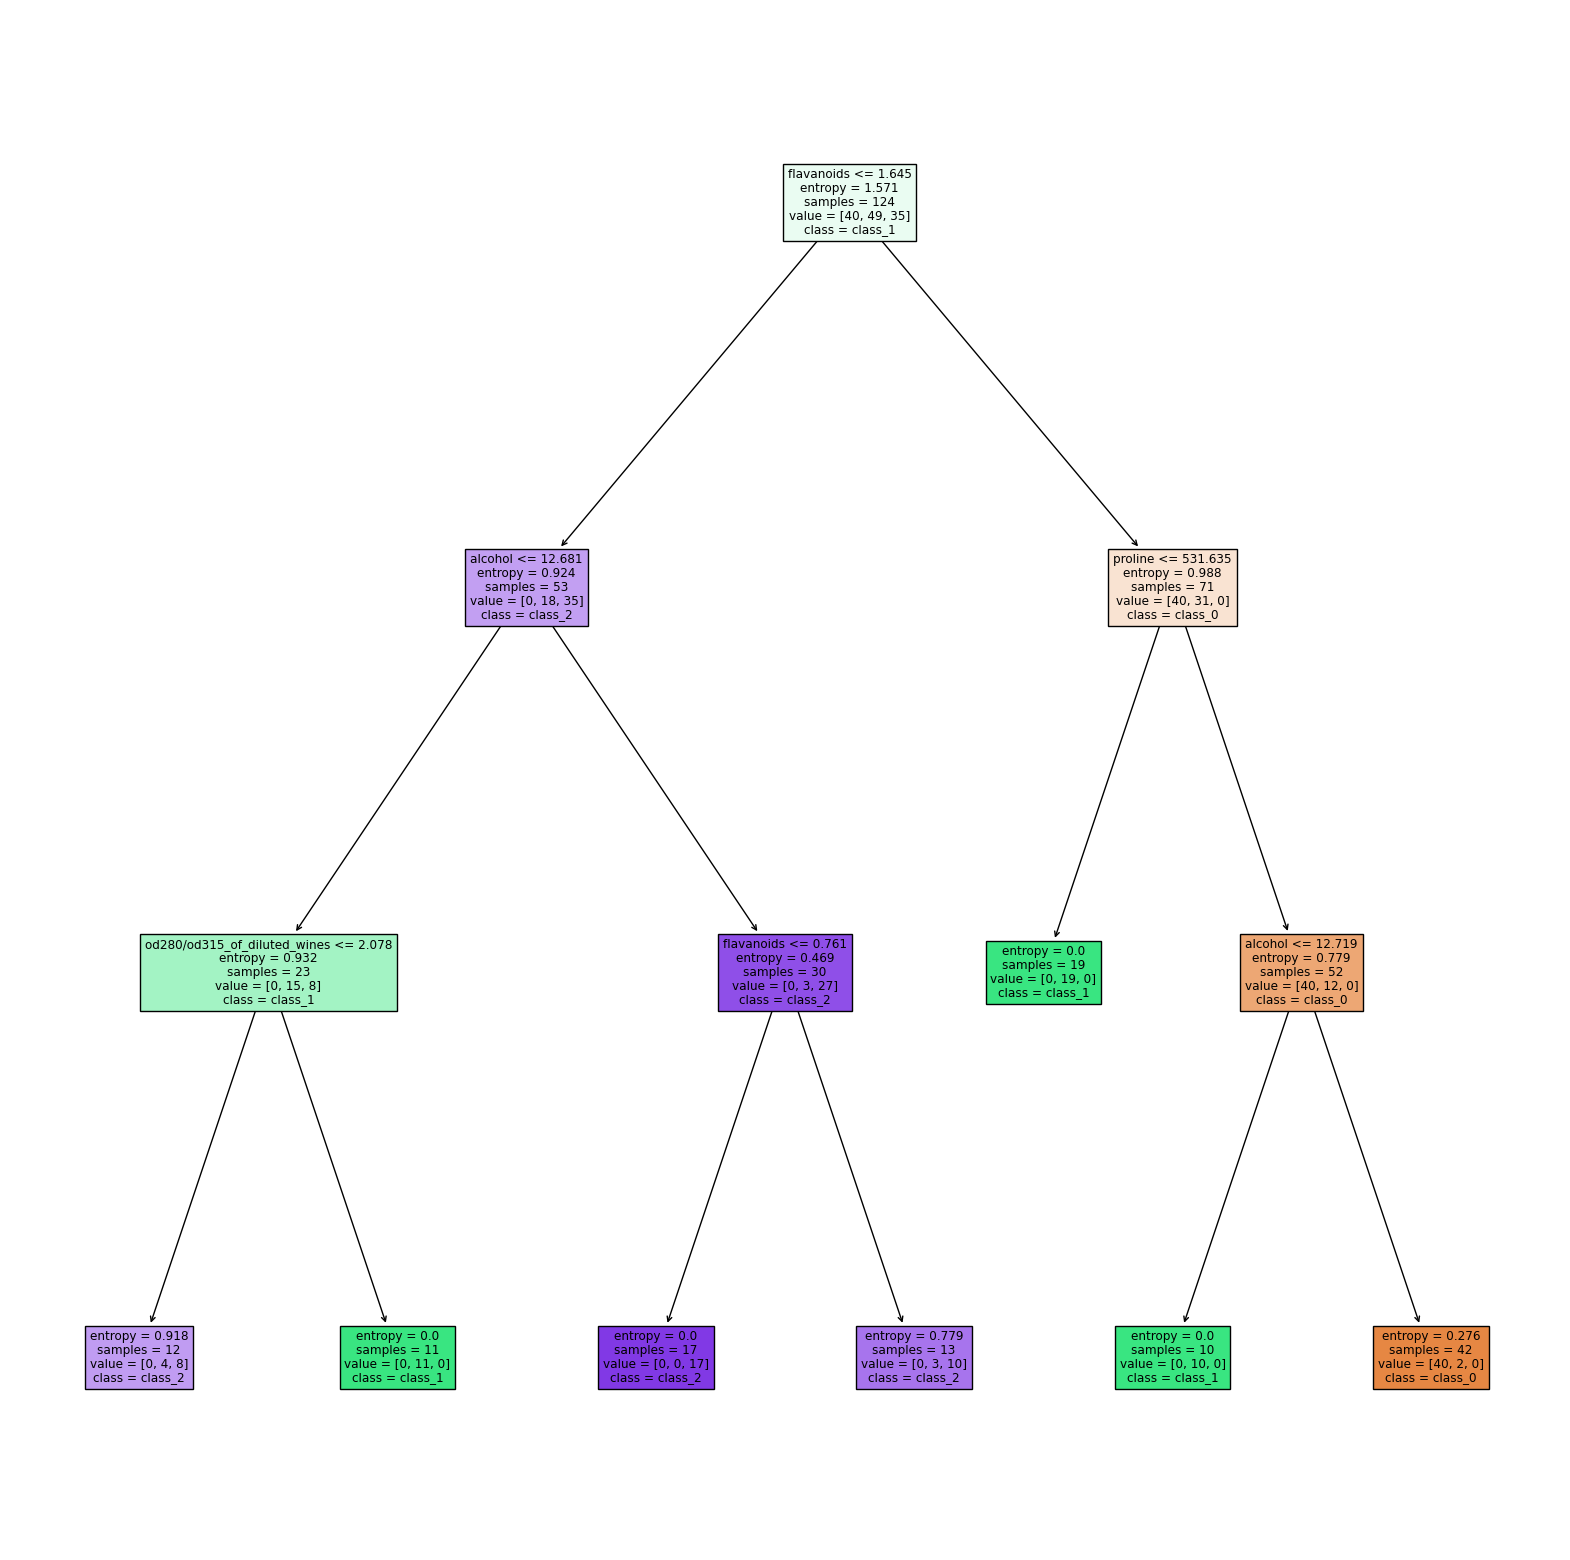

In [131]:
fig =plt.figure(figsize=(20,20))
_ = tree.plot_tree(model
                   ,feature_names=wine.feature_names
                   ,class_names=wine.target_names
                   ,filled=True
                 #  ,rounded=True
                   )

In [132]:
model.feature_importances_
[*zip(feature_names, model.feature_importances_)]

[('alcohol', 0.2617387613844496),
 ('malic_acid', 0.0),
 ('ash', 0.0),
 ('alcalinity_of_ash', 0.0),
 ('magnesium', 0.0),
 ('total_phenols', 0.0),
 ('flavanoids', 0.4910005535635405),
 ('nonflavanoid_phenols', 0.0),
 ('proanthocyanins', 0.0),
 ('color_intensity', 0.0),
 ('hue', 0.0),
 ('od280/od315_of_diluted_wines', 0.06429656756302878),
 ('proline', 0.18296411748898112)]

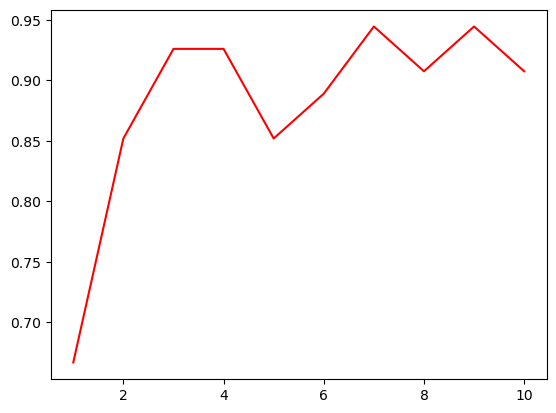

In [29]:
#test the range of max_depth

def test_max_depth(max_depth): 
    Xtrain, Xtest, Ytrain, Ytest = train_test_split(wine.data, wine.target, test_size=0.3)
    model = tree.DecisionTreeClassifier(criterion="entropy" # entropy or gini, entropy maybe overfitting
                                        ,random_state=0   # random seeds
                                    ,splitter="random"  # random split, these two parameters can avoid overfitting
                                        ,max_depth=max_depth
                                    ,min_samples_leaf=10 # the minimum number of samples required to be at a leaf node
                                    #  ,min_samples_split=10  # the minimum number of samples required to split an internal node 
                    )
    model.fit(Xtrain, Ytrain)
    score = model.score(Xtest, Ytest)
    return score

test_socre = []
for i in range(10):
    test_socre.append(test_max_depth(i+1))
plt.plot(range(1,11), test_socre, color="red", label="max_depth")